In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import visvis as vv

import os
import glob


k=120*np.ones((10,10,1))
h=np.empty((10,10,1))

for i in xrange(3):
    #h= np.append([[h],[k]],axis=2)
    h= np.concatenate([h,k],axis=2)
    print i
#print h.shape

new = h[:,:,1:]
print new.shape

plt.imshow(new, cmap = 'gray')
plt.show()

0
1
2
(10, 10, 3)


In [2]:
print new.shape

(10, 10, 3)


In [3]:
import json

# Make it work for Python 2+3 and with Unicode
import io
try:
    to_unicode = unicode
except NameError:
    to_unicode = str
    

In [4]:

with open('/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/poses/0001.json') as json_data:
    d = json.load(json_data)
    print(d)
    
d0=d

{u'c_y': 540, u'c_x': 960, u'extrinsic': [[0.2912225672444199, -0.9566583930814945, -1.1050980618446116e-06, 10468.506332562349], [0.04214992399226091, 0.012831574855939424, 0.9990278085726401, 380.3140607381877], [0.9557203733744195, 0.2909469964707039, -0.044059201127544634, 1720.458354459683], [0.0, 0.0, 0.0, 1.0]], u'f_x': 1157.8473936386729, u'f_y': 1157.8410025185074}


In [5]:
d0[u'c_x']
h0= d0[u'extrinsic']

In [6]:
h0 = np.asarray(h0)
h0.size

16

In [7]:
h0.shape
print h0

[[ 2.91222567e-01 -9.56658393e-01 -1.10509806e-06  1.04685063e+04]
 [ 4.21499240e-02  1.28315749e-02  9.99027809e-01  3.80314061e+02]
 [ 9.55720373e-01  2.90946996e-01 -4.40592011e-02  1.72045835e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [8]:
with open('/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/poses/0002.json') as json_data:
    d1 = json.load(json_data)
    print(d1)

{u'c_y': 540, u'c_x': 960, u'extrinsic': [[0.44944077552238715, -0.8933106512288262, 2.4090045041297997e-06, 10610.533563467348], [-0.01690145596376347, -0.008503422362530816, 0.9998220542739001, 304.10692354956547], [0.8931508741459225, 0.44935994093977144, 0.01891721436964068, -57.07529279155492], [0.0, 0.0, 0.0, 1.0]], u'f_x': 1157.8365477327766, u'f_y': 1157.841833776468}


In [9]:
h1= d1[u'extrinsic']
h1 = np.asarray(h1)
h1.shape
print h1

[[ 4.49440776e-01 -8.93310651e-01  2.40900450e-06  1.06105336e+04]
 [-1.69014560e-02 -8.50342236e-03  9.99822054e-01  3.04106924e+02]
 [ 8.93150874e-01  4.49359941e-01  1.89172144e-02 -5.70752928e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [10]:
h1-h0

array([[ 1.58218208e-01,  6.33477419e-02,  3.51410257e-06,
         1.42027231e+02],
       [-5.90513800e-02, -2.13349972e-02,  7.94245701e-04,
        -7.62071372e+01],
       [-6.25694992e-02,  1.58412944e-01,  6.29764155e-02,
        -1.77753365e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [11]:
#determine R
r1 = h1[:3,:3]
r1.shape
r1

r0 = h0[:3,:3]
r0.shape
r0

#determine T

t1 = h1[:3,3:]
t1.shape
t1

t0 = h0[:3,3:]
t0.shape
t0

d0

{u'c_x': 960,
 u'c_y': 540,
 u'extrinsic': [[0.2912225672444199,
   -0.9566583930814945,
   -1.1050980618446116e-06,
   10468.506332562349],
  [0.04214992399226091,
   0.012831574855939424,
   0.9990278085726401,
   380.3140607381877],
  [0.9557203733744195,
   0.2909469964707039,
   -0.044059201127544634,
   1720.458354459683],
  [0.0, 0.0, 0.0, 1.0]],
 u'f_x': 1157.8473936386729,
 u'f_y': 1157.8410025185074}

In [12]:
#determine intrinsic matrix
k0 = np.asarray([[d0[u'f_x'],0,d0[u'c_x']],[0,d0[u'f_y'],d0[u'c_x']],[0,0,1]])
k1 = np.asarray([[d1[u'f_x'],0,d1[u'c_x']],[0,d1[u'f_y'],d1[u'c_x']],[0,0,1]])
print k0
print k1
print t1
n1_trans = np.zeros((1,3))
print n1_trans
k1_trans = np.transpose(k1) 
r1_trans = np.transpose(r1) 
depth = 2000

[[1.15784739e+03 0.00000000e+00 9.60000000e+02]
 [0.00000000e+00 1.15784100e+03 9.60000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.15783655e+03 0.00000000e+00 9.60000000e+02]
 [0.00000000e+00 1.15784183e+03 9.60000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[10610.53356347]
 [  304.10692355]
 [  -57.07529279]]
[[0. 0. 0.]]


In [13]:
H = k0*r0*(np.identity(3) - ((t1 - t0)* (n1_trans)/depth))*k1_trans*r1_trans
print H

[[ 1.75467252e+05  0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -1.46275595e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.33477353e-04]]


In [14]:
x= np.asarray([[2,2,1]])
x

array([[2, 2, 1]])

In [15]:
x_ = np.matmul(H,np.transpose(x))
print x_

[[ 3.50934503e+05]
 [-2.92551191e+02]
 [-8.33477353e-04]]


In [16]:
x_[0]

array([350934.50335649])

In [17]:
import OpenEXR

filename = "/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/depths/0000.exr"
dep0 = OpenEXR.InputFile(filename)
dpth = np.asarray(dep0)

print OpenEXR.InputFile(filename).header()

{'compression': ZIP_COMPRESSION, 'pixelAspectRatio': 1.0, 'displayWindow': (0, 0) - (1919, 1079), 'channels': {'Y': HALF (1, 1)}, 'dataWindow': (0, 0) - (1919, 1079), 'screenWindowCenter': (0.0, 0.0), 'screenWindowWidth': 1.0, 'lineOrder': INCREASING_Y}


In [18]:
import cv2
exr_d = cv2.imread('/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/depths/0000.exr')

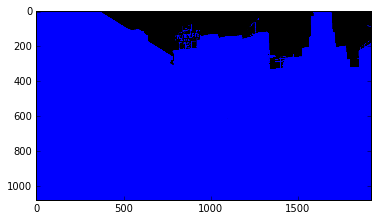

In [19]:
plt.imshow(exr_d)

In [20]:

im = imageio.imread('/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/depths/0000.exr')
vv.imshow(im)

[[0.00544218 0.00543848 0.00543478 ... 0.         0.         0.        ]
 [0.00544218 0.00543848 0.00543478 ... 0.         0.         0.        ]
 [0.00544218 0.00543848 0.00543478 ... 0.         0.         0.        ]
 ...
 [0.011994   0.011994   0.011994   ... 0.01265823 0.01265823 0.01265823]
 [0.01201201 0.01201201 0.01201201 ... 0.01267829 0.01267829 0.01267829]
 [0.01203913 0.01203913 0.01203913 ... 0.01269841 0.01269841 0.0127085 ]]


127.795525

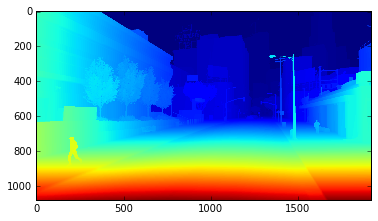

In [21]:
plt.imshow(im)
im
ref_depth_full = im
valid_mask_full = ref_depth_full != 0.0
ref_depth_full = np.where(valid_mask_full, 1.0 / ref_depth_full, 0.0)
plt.imshow(ref_depth_full)
print ref_depth_full
ref_depth_full = 10000 * ref_depth_full

np.max(ref_depth_full)

In [22]:
directory = ('/graphics/scratch/mallick/MVS_synth/GTAV_1080/')
os.walk(directory)
#zip_list = [str for str in os.listdir(zip_folder) if 'drive' in str]
#[x[0] for x in os.walk(directory)]
print 'next'
#fold_list = next(os.walk('/graphics/scratch/mallick/MVS_synth/GTAV_1080/'))[1]
fold_list = next(os.walk(directory))[1]
for i in xrange(len(fold_list)):
    for j in xrange(98):
        img_path_f1 = '/graphics/scratch/mallick/MVS_synth/GTAV_1080/'+ fold_list[i] + '/images/'+str(j).zfill(4)+'.png'
        img_path = '/graphics/scratch/mallick/MVS_synth/GTAV_1080/'+ fold_list[i] + '/images/'+str(j+1).zfill(4)+'.png'
        img_path_f2 = '/graphics/scratch/mallick/MVS_synth/GTAV_1080/'+ fold_list[i] + '/images/'+str(j+2).zfill(4)+'.png'
        
        depth_path = '/graphics/scratch/mallick/MVS_synth/GTAV_1080/'+ fold_list[i] + '/depths/'+str(j).zfill(4)+'.exr'
        pose_path = '/graphics/scratch/mallick/MVS_synth/GTAV_1080/'+ fold_list[i] + '/poses/'+str(j).zfill(4)+'.json'
        #cv2.imread(img_path)
        print(os.path.exists(img_path))
        print(os.path.exists(depth_path))
        print(os.path.exists(pose_path))
        
        if os.path.exists(img_path)== False or os.path.exists(img_path_f2)== False or os.path.exists(img_path_f1)== False:
            print 'bharwa baba ki jay ho'
            print img_path
            break
        
        
        print img_path 


#fold_list[56]
print 'enddddddddddddddddd'
print img_path

next
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0001.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0002.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0003.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0004.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0005.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0006.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0007.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0008.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0009.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0010.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0011.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0000/images/0012.png
True
True
T

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0086.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0087.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0088.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0089.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0090.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0091.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0092.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0093.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0094.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0095.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0096.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0001/images/0097.png
True
True
True
/graphics/s

True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0078.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0079.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0080.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0081.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0082.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0083.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0084.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0085.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0086.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0087.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0088.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0003/images/0089.png
True
True
True
/

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0005/images/0074.png
True
True
True
/graphics/s

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0062.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0007/images/0071.png
True
True
True
/graphics/scratc

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0074.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0009/images/0075.png
True
True
True
/graph

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0048.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0049.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0052.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0058.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0011/images/0059.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0047.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0048.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0049.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0052.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0013/images/0058.png
True
True
True
/graphics/s

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0044.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0045.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0046.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0047.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0048.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0049.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0052.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0015/images/0055.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0052.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0058.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0059.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0017/images/0061.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0058.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0059.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0062.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0019/images/0066.png
True
True
True
/graphics/s

True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0058.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0059.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0062.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0022/images/0064.png
True
True
True
/

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0059.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0062.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0024/images/0070.png
True
True
True
/graphics/s

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0026/images/0074.png
True
True
True
/graph

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0074.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0028/images/0075.png
True
True
True
/graph

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0074.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0075.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0076.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0077.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0078.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0079.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0080.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0081.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0082.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0083.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0030/images/0084.png
True
True
True
/graph

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0040.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0041.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0042.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0043.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0044.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0045.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0046.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0047.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0048.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0049.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0032/images/0051.png
True
True
True
/graphics/s

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0075.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0076.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0077.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0078.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0079.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0080.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0081.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0082.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0083.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0084.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0085.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0033/images/0086.png
True
True
True
/graphics/scratc

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0078.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0079.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0080.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0081.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0082.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0083.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0084.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0085.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0086.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0087.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0088.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0035/images/0089.png
True
True
True
/graph

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0080.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0081.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0082.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0083.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0084.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0085.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0086.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0087.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0088.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0089.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0090.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0037/images/0091.png
True
True
True
/graph

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0080.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0081.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0082.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0083.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0084.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0085.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0086.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0087.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0088.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0089.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0090.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0039/images/0091.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0086.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0087.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0088.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0089.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0090.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0091.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0092.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0093.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0094.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0095.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0096.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0042/images/0097.png
True
True
True
/graphics/s

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0090.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0091.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0092.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0093.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0094.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0095.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0096.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0097.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0044/images/0098.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0045/images/0001.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0045/images/0002.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0045/images/0003.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0078.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0079.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0080.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0081.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0082.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0083.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0084.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0085.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0086.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0087.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0088.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0046/images/0089.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0058.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0059.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0062.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0048/images/0066.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0046.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0047.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0048.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0049.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0052.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0050/images/0057.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0027.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0028.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0029.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0030.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0031.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0032.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0033.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0034.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0035.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0052/images/0036.png
True
True
True
/graphics/s

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0027.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0028.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0029.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0030.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0031.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0032.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0033.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0034.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0035.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0054/images/0036.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0027.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0028.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0029.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0030.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0031.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0056/images/0032.png
True
True
True
/graphics/scratc

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0027.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0028.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0029.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0030.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0031.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0032.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0058/images/0033.png
True
True
True
/graph

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0016.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0017.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0018.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0019.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0020.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0060/images/0027.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0012.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0013.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0014.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0015.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0016.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0017.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0018.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0019.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0020.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0063/images/0023.png
True
True
True
/graphics/s

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0064/images/0096.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0064/images/0097.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0064/images/0098.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0001.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0002.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0003.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0004.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0005.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0006.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0007.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0008.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0065/images/0009.png
True
True
True
/graphics/s

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0066/images/0074.png
True
True
True
/graphics/s

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0032.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0033.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0034.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0035.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0036.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0037.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0038.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0039.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0040.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0041.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0042.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0068/images/0043.png
True
True
True
/graph

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0029.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0030.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0031.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0032.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0033.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0034.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0035.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0036.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0037.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0038.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0039.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0070/images/0040.png
True
True
True
/graph

True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0027.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0028.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0029.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0030.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0031.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0072/images/0032.png
True
True
True
/

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0027.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0028.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0029.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0030.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0031.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0032.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0033.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0074/images/0034.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0031.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0032.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0033.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0034.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0035.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0036.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0037.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0038.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0039.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0040.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0041.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0076/images/0042.png
True
True
True
/graphics/s

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0038.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0039.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0040.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0041.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0042.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0043.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0044.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0045.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0046.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0047.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0048.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0078/images/0049.png
True
True
True
/graphics/s

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0041.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0042.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0043.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0044.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0045.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0046.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0047.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0048.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0049.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0080/images/0052.png
True
True
True
/graph

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0015.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0016.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0017.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0018.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0019.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0020.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0082/images/0026.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0049.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0052.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0058.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0059.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0084/images/0060.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0052.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0058.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0059.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0086/images/0062.png
True
True
True
/graphics/scratc

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0062.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0088/images/0071.png
True
True
True
/graph

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0074.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0075.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0090/images/0076.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0058.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0059.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0060.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0062.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0092/images/0064.png
True
True
True
/graphics/s

True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0061.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0062.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0063.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0064.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0094/images/0072.png
True
True
True
/

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0074.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0075.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0076.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0077.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0096/images/0078.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0074.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0075.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0076.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0077.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0078.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0079.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0080.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0081.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0082.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0098/images/0083.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0065.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0066.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0067.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0068.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0069.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0070.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0071.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0072.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0073.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0074.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0075.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0100/images/0076.png
True
True
True
/graphics/s

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0047.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0048.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0049.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0050.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0051.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0052.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0053.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0054.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0055.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0056.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0057.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0102/images/0058.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0018.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0019.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0020.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0027.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0028.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0104/images/0029.png
True
True
True
/graphics/s

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0014.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0015.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0016.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0017.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0018.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0019.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0020.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0106/images/0025.png
True
True
True
/graphics/scratc

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0008.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0009.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0010.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0011.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0012.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0013.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0014.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0015.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0016.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0017.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0018.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0108/images/0019.png
True
True
True
/graphics/s

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0004.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0005.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0006.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0007.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0008.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0009.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0010.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0011.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0012.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0013.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0014.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0110/images/0015.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0004.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0005.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0006.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0007.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0008.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0009.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0010.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0011.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0012.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0013.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0014.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0112/images/0015.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0001.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0002.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0003.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0004.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0005.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0006.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0007.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0008.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0009.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0010.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0011.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0114/images/0012.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0115/images/0095.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0115/images/0096.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0115/images/0097.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0115/images/0098.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0116/images/0001.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0116/images/0002.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0116/images/0003.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0116/images/0004.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0116/images/0005.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0116/images/0006.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0116/images/0007.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0116/images/0008.png
True
True
True
/graphics/scratc

/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0003.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0004.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0005.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0006.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0007.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0008.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0009.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0010.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0011.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0012.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0013.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0118/images/0014.png
True
True
True
/graphics/scratc

True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0011.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0012.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0013.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0014.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0015.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0016.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0017.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0018.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0019.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0020.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0020/images/0022.png
True
True
True
/graph

True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0016.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0017.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0018.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0019.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0020.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0021.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0022.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0023.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0024.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0025.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0026.png
True
True
True
/graphics/scratch/mallick/MVS_synth/GTAV_1080/0062/images/0027.png
True
True
True
/graphics/s

In [23]:
d='/graphics/scratch/mallick/MVS_synth/GTAV_1080/'
d = img_path
filter(lambda x: os.path.isdir(os.path.join(d, x)), os.listdir(d))
file_list = os.listdir(d)
len(file_list)
len(fold_list)
print d

OSError: [Errno 20] Not a directory: '/graphics/scratch/mallick/MVS_synth/GTAV_1080/0083/images/0098.png'

In [ ]:
X = 60
str(X).zfill(4)

In [ ]:
x = np.int_(np.random.rand(10) * 10)
x

In [ ]:
x = (np.random.rand(10) * 10)
x

In [ ]:
np.random.randint(256, size=(4, 4))

In [ ]:
x = np.random.uniform(0,255,(3,2))
x

In [ ]:
rand_depth_map = np.random.randint(5, size=(2, 4))
ax1 = ((1,0),(1,0))
ax2 = (1,1)
ax3 = 3

A = np.random.randint(2, size=(16,6, 5, 10))
B = np.random.randint(2, size=(16,6, 5, 10))
product = np.tensordot(A, B,axes = ax1)
print product
product.shape

In [ ]:
a = np.arange(36).reshape((3,2,6))
b = np.arange(36).reshape((3,2,6))


product = np.einsum('kijl,kijl->kij', A,B)

In [ ]:
product.shape

In [ ]:
x = np.random.rand(100,100)
x.shape
plt.imshow(x)

In [24]:
np.zeros(10,10)

TypeError: data type not understood